<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/2%EC%9D%BC%EC%B0%A8_%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B5%AC%EC%94%A8%EB%A5%BC%EC%B0%BE%EC%95%84%EB%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 탐색적데이터 분석

## 3. 공공 데이터 분석-구씨를 찾아라



---



**[주의!] (코랩)한글 폰트 지정하는 방법**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and direc



---



### 1.데이터 다운로드하기

- 국가통계포털에서 성씨 데이터를 다운로드한다.
- https://kosis.kr/index/index.do
- csv파일 다운로드해서 사용
- 성씨ㆍ본관별_인구__시군구_20241013003414.csv



- 파일 업로드하기

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
input = '성씨ㆍ본관별_인구__시군구_20241021153855.csv'

## [퀴즈] 전국 성씨 순위구하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('성씨ㆍ본관별_인구__시군구_20241021153855.csv') #encoding='cp949': 윈도우OS 기본 인코딩 포맷
df.columns = ['성씨', '지역', '인구']
df.head(5)

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601


In [ ]:
# 성씨에서 한자 제외시키기 -----------
tmp1, tmp2, tmp3 = list(), list(), list()
for row in df.iterrows():
    tmp1.append(row[1]['성씨'].split('(')[0])
    tmp2.append(row[1]['지역'])
    tmp3.append(row[1]['인구'])

df_all = pd.DataFrame([ x for x in zip(tmp1,tmp2,tmp3)])
df_all.columns = df.columns
df_all

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(input) #cp949: 윈도우OS 기본 인코딩 포맷
df.columns = ['성씨', '지역', '인구']

df = df.query(" 지역 == '전국' and 성씨 != '계'")

# 성씨에서 한자 제외시키기 -----------
tmp1, tmp2, tmp3 = list(), list(), list()
for row in df.iterrows():
    tmp1.append(row[1]['성씨'].split('(')[0])
    tmp2.append(row[1]['지역'])
    tmp3.append(row[1]['인구'])

df_all = pd.DataFrame([ x for x in zip(tmp1,tmp2,tmp3)])
df_all.columns = df.columns
df_all
#-------------------------------------

# 한자를 다르게 쓰는 [성씨]를 [지역]별로 합계 구하기
df_all_group = df_all.groupby('성씨').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_all_group = df_all_group.sort_values(by = '인구', ascending = False)

# 파일명 지정하여 저장하기
savefile = 'familyname_ranking.csv'  # 파일명
df_all_group.to_csv(savefile, mode = 'w') # 파일 저장하기

df_all_group.head(10)

,지역,인구
성씨,,
김,전국,10689959
이,전국,7306828
박,전국,4192074
정,전국전국전국,2407365
최,전국전국,2340509
조,전국전국,1453827
강,전국전국,1268472
윤,전국,1020547
장,전국전국전국,1019993


----------------------------------

## 구씨를 찾아라!

### 3-1.파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 1. 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기
 2. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 3. 데이터 전처리하기 : 필요한 데이터만 추출하기
 4. 데이터 시각화하기 : 데이터 그래프로 나타내기
 5. 데이터 저장하기 :  파일로 저장하기

---

### 2.데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다.

In [ ]:
import pandas as pd

df = pd.read_csv('성씨ㆍ본관별_인구__시군구_20241021153855.csv')
df.tail()

,"성씨, 본관별",행정구역별(시군구),2015
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711
2768,기타,제주특별자치도,1935


In [ ]:
df.info()  # 가져온 데이터의 기본정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   성씨, 본관별     2769 non-null   object
 1   행정구역별(시군구)  2769 non-null   object
 2   2015        2769 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.0+ KB


---

### 3.데이터 전처리하기 : 필요한 데이터만 추출하기

#### @컬럼이름 변경하기

In [ ]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [ ]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns
df.head()

,성씨,지역,인구
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601


In [ ]:
# 특정 컬럼 이름만 변경
df = df.rename(columns={'인구': '인구수'})
print(df.head(1))
df = df.rename(columns={'인구수': '인구'})
df.head(1)

  성씨  지역       인구수
0  계  전국  49705663


,성씨,지역,인구
0,계,전국,49705663


#### @고유한 성씨만 출력하기

In [ ]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨']) # 파이썬에서 set()은 중복 허용 안함.

{'가(賈)',
 '간(簡)',
 '갈(葛)',
 '감(甘)',
 '강(姜)',
 '강(康)',
 '견(甄)',
 '경(慶)',
 '경(景)',
 '계',
 '계(桂)',
 '고(高)',
 '공(孔)',
 '곽(郭)',
 '구(丘)',
 '구(具)',
 '국(鞠)',
 '권(權)',
 '금(琴)',
 '기(奇)',
 '기타',
 '길(吉)',
 '김(金)',
 '나(羅)',
 '남(南)',
 '남궁(南宮)',
 '노(盧)',
 '노(魯)',
 '단(段)',
 '당(唐)',
 '도(都)',
 '도(陶)',
 '동(董)',
 '두(杜)',
 '라(羅)',
 '류(柳)',
 '마(馬)',
 '맹(孟)',
 '명(明)',
 '모(牟)',
 '목(睦)',
 '문(文)',
 '민(閔)',
 '박(朴)',
 '반(潘)',
 '방(房)',
 '방(方)',
 '배(裵)',
 '백(白)',
 '범(范)',
 '변(卞)',
 '변(邊)',
 '복(卜)',
 '봉(奉)',
 '부(夫)',
 '빈(賓)',
 '사(史)',
 '사공(司空)',
 '상(尙)',
 '서(徐)',
 '서문(西門)',
 '석(昔)',
 '석(石)',
 '선(宣)',
 '선우(鮮于)',
 '설(偰)',
 '설(薛)',
 '성(成)',
 '소(蘇)',
 '소(邵)',
 '손(孫)',
 '송(宋)',
 '승(承)',
 '시(施)',
 '시(柴)',
 '신(愼)',
 '신(申)',
 '신(辛)',
 '심(沈)',
 '안(安)',
 '양(梁)',
 '양(楊)',
 '어(魚)',
 '엄(嚴)',
 '여(余)',
 '여(呂)',
 '연(延)',
 '염(廉)',
 '예(芮)',
 '오(吳)',
 '옥(玉)',
 '온(溫)',
 '왕(王)',
 '용(龍)',
 '우(禹)',
 '원(元)',
 '위(魏)',
 '유(兪)',
 '유(劉)',
 '유(庾)',
 '유(柳)',
 '육(陸)',
 '윤(尹)',
 '은(殷)',
 '음(陰)',
 '이(李)',
 '인(印)',
 '임(任)',
 '임(林)',
 '장(張)',
 '장(章)'

In [ ]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))

155

In [ ]:
df[df['성씨'] != '계'] # 성씨의 합계인 '계'인 것은 제외함

# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))

155

In [ ]:
data = set()
for name in set(df['성씨']): # 파이썬의 set 자료형은 중복을 허락하지 않음.
    data.add(name.split( '(' )[0])  # '(' 를 기준으로 분리한 후 첫번째 인덱스 값을 보여줘
# 위의 3줄을 파이썬 코드로 한 줄로 표시하면
# set(name.split( '(' )[0] for name in set(df['성씨']) )

print(data)
type(data)
data

# 순서가 없는 데이터형태를 순서가 있는 형태로 변경
sorted(list(data)) # data(집합데이터) --> 리스트로 변환 --> 정렬 적용: 순서대로 출력

{'봉', '승', '길', '심', '정', '선', '가', '변', '맹', '권', '염', '국', '인', '남궁', '배', '탁', '경', '당', '시', '민', '하', '마', '허', '용', '양', '금', '명', '오', '장', '복', '엄', '계', '은', '형', '나', '곽', '위', '이', '어', '우', '소', '제', '석', '모', '팽', '천', '표', '선우', '김', '감', '원', '도', '상', '사', '동', '한', '박', '반', '구', '부', '서문', '견', '강', '임', '서', '사공', '윤', '기타', '주', '여', '황', '갈', '채', '설', '송', '공', '제갈', '조', '고', '기', '범', '성', '황보', '백', '함', '신', '왕', '차', '음', '진', '손', '추', '최', '지', '예', '빈', '옥', '문', '연', '편', '목', '라', '유', '태', '간', '안', '육', '전', '홍', '단', '온', '피', '남', '노', '두', '좌', '류', '현', '호', '방'}


['가',
 '간',
 '갈',
 '감',
 '강',
 '견',
 '경',
 '계',
 '고',
 '공',
 '곽',
 '구',
 '국',
 '권',
 '금',
 '기',
 '기타',
 '길',
 '김',
 '나',
 '남',
 '남궁',
 '노',
 '단',
 '당',
 '도',
 '동',
 '두',
 '라',
 '류',
 '마',
 '맹',
 '명',
 '모',
 '목',
 '문',
 '민',
 '박',
 '반',
 '방',
 '배',
 '백',
 '범',
 '변',
 '복',
 '봉',
 '부',
 '빈',
 '사',
 '사공',
 '상',
 '서',
 '서문',
 '석',
 '선',
 '선우',
 '설',
 '성',
 '소',
 '손',
 '송',
 '승',
 '시',
 '신',
 '심',
 '안',
 '양',
 '어',
 '엄',
 '여',
 '연',
 '염',
 '예',
 '오',
 '옥',
 '온',
 '왕',
 '용',
 '우',
 '원',
 '위',
 '유',
 '육',
 '윤',
 '은',
 '음',
 '이',
 '인',
 '임',
 '장',
 '전',
 '정',
 '제',
 '제갈',
 '조',
 '좌',
 '주',
 '지',
 '진',
 '차',
 '채',
 '천',
 '최',
 '추',
 '탁',
 '태',
 '팽',
 '편',
 '표',
 '피',
 '하',
 '한',
 '함',
 '허',
 '현',
 '형',
 '호',
 '홍',
 '황',
 '황보']

In [ ]:
# 한글 성씨만 출력하기 -> '가(賈)'--> 가  만 추출하기
familyname = set(name.split( '(' )[0] for name in set(df['성씨']) )
print(familyname)

# 고유한 한글 성씨 총개수 출력하기
len(familyname)

{'봉', '승', '길', '심', '정', '선', '가', '변', '맹', '권', '염', '국', '인', '남궁', '배', '탁', '경', '당', '시', '민', '하', '마', '허', '용', '양', '금', '명', '오', '장', '복', '엄', '계', '은', '형', '나', '곽', '위', '이', '어', '우', '소', '제', '석', '모', '팽', '천', '표', '선우', '김', '감', '원', '도', '상', '사', '동', '한', '박', '반', '구', '부', '서문', '견', '강', '임', '서', '사공', '윤', '기타', '주', '여', '황', '갈', '채', '설', '송', '공', '제갈', '조', '고', '기', '범', '성', '황보', '백', '함', '신', '왕', '차', '음', '진', '손', '추', '최', '지', '예', '빈', '옥', '문', '연', '편', '목', '라', '유', '태', '간', '안', '육', '전', '홍', '단', '온', '피', '남', '노', '두', '좌', '류', '현', '호', '방'}


120

---------------------

#### @[성씨]가  '구'인 데이터 추출하기

In [ ]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['성씨'].str.contains('구')]

,성씨,지역,인구
247,구(丘),전국,15382
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781


In [ ]:
# [지역] 열에서 '제주'가 포함된 데이터 출력하기
df[df['지역'].str.contains('제주')]

,성씨,지역,인구
17,계,제주특별자치도,590473
35,가(賈),제주특별자치도,28
69,갈(葛),제주특별자치도,5
87,감(甘),제주특별자치도,20
105,강(姜),제주특별자치도,31678
...,...,...,...
2696,호(胡),제주특별자치도,8
2714,홍(洪),제주특별자치도,11583
2732,황(黃),제주특별자치도,3901
2750,황보(皇甫),제주특별자치도,79


In [ ]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
print(df[df['성씨'].str.contains('구')]) # .str : df가 object형인 것을 str형으로 변환함.

print('='*40)
# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_goo = df[df['성씨'].str.contains('구') & (df['지역'] != '전국')]
df_goo

       성씨       지역      인구
247  구(丘)       전국   15382
248  구(丘)    서울특별시    3855
249  구(丘)    부산광역시     162
250  구(丘)    대구광역시     126
251  구(丘)    인천광역시     974
252  구(丘)    광주광역시      60
253  구(丘)    대전광역시    1175
254  구(丘)    울산광역시     110
255  구(丘)  세종특별자치시     106
256  구(丘)      경기도    4781
257  구(丘)      강원도     217
258  구(丘)     충청북도     348
259  구(丘)     충청남도    2432
260  구(丘)     전라북도     539
261  구(丘)     전라남도      93
262  구(丘)     경상북도     224
263  구(丘)     경상남도     130
264  구(丘)  제주특별자치도      50
265  구(具)       전국  193080
266  구(具)    서울특별시   35002
267  구(具)    부산광역시   17709
268  구(具)    대구광역시   15187
269  구(具)    인천광역시   11054
270  구(具)    광주광역시    5072
271  구(具)    대전광역시    5120
272  구(具)    울산광역시    4245
273  구(具)  세종특별자치시     626
274  구(具)      경기도   42791
275  구(具)      강원도    3115
276  구(具)     충청북도    5101
277  구(具)     충청남도    7629
278  구(具)     전라북도    5101
279  구(具)     전라남도    4535
280  구(具)     경상북도    9776
281  구(具)     경상남도   20237
282  구(具)  제주특별자치도     780


,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


### **[실습문제] 자신의 성씨 데이터 출력하기**


In [ ]:
# [성씨] 열에서 '김'이 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_my = df[df['성씨'].str.contains('김') & (df['지역'] != '전국')]
df_my


,성씨,지역,인구
374,김(金),서울특별시,2025779
375,김(金),부산광역시,757159
376,김(金),대구광역시,521160
377,김(金),인천광역시,598187
378,김(金),광주광역시,338304
379,김(金),대전광역시,309274
380,김(金),울산광역시,262050
381,김(金),세종특별자치시,39432
382,김(金),경기도,2523923
383,김(金),강원도,338077


#### @데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [ ]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=True) # True: 숫자 데이터만 적용
df_goo_group

,인구
지역,
강원도,3332
경기도,47572
경상남도,20367
경상북도,10000
광주광역시,5132
대구광역시,15313
대전광역시,6295
부산광역시,17871
서울특별시,38857


In [ ]:
# 1.'구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)
# df_goo_group


# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False) # ascending = False: 내림차순으로 정렬
df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


### **[실습문제] 자신의 한글 성씨 데이터를 [지역]별로 [인구] 합계 출력하기**

In [ ]:
# 자신의 한글 성씨 데이터를 지역별 합계 데이터를 '인구' 크기순으로 정렬하기

# [성씨] 열에서 '김'이 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_my = df[df['성씨'].str.contains('김') & (df['지역'] != '전국')]
# df_my

# df_my_group = df_goo.groupby('지역').sum()
df_my_group = df_my.groupby('지역').sum(numeric_only=False)
# df_my_group
print(df_my_group.sum())
print('='*50)
# 2.지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my_group.sort_values(by = '인구', ascending = False) # ascending = False: 내림차순으로 정렬
print(df_my_group.sum())
print('='*50)
df_my_group

성씨    김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(...
인구                                             10689959
dtype: object
성씨    김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(金)김(...
인구                                             10689959
dtype: object


,성씨,인구
지역,,
경기도,김(金),2523923
서울특별시,김(金),2025779
부산광역시,김(金),757159
경상남도,김(金),697357
경상북도,김(金),603188
인천광역시,김(金),598187
대구광역시,김(金),521160
충청남도,김(金),423510
전라남도,김(金),413805


---------------------------

### 4.데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html

#### @막대 그래프로 시각화하기

In [ ]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

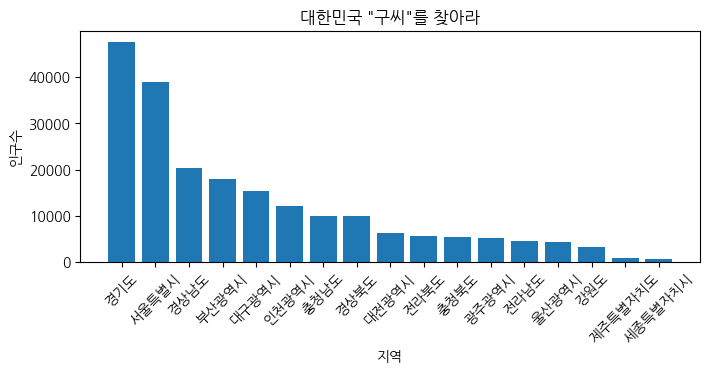

In [ ]:
import matplotlib.pyplot as plt

# 코랩에서 한글 폰트 설치한 후 사용하기!!!
# plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumGothic')       # (코랩)한글 폰트
# plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트
plt.rc('figure', figsize=(8,3)) # 그래프 크기 조절

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
# plt.title('Find Familyname Goo!!! ') # 그래프 제목
plt.xlabel('지역')                    # x축 이름
plt.ylabel('인구수')                  # y축 이름
plt.xticks(rotation = 45)             # X축 레이블 회전
plt.show()                            # 그래프 출력하기

#### @그래프 꾸미기

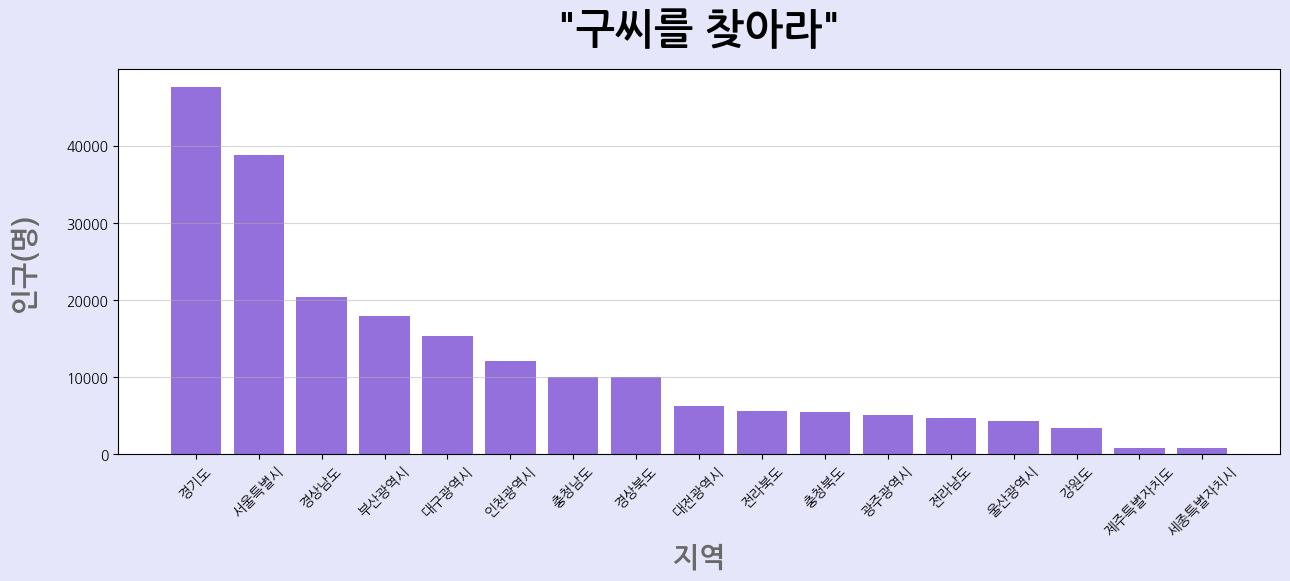

In [ ]:
import matplotlib.pyplot as plt

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @선 그래프로 시각화하기

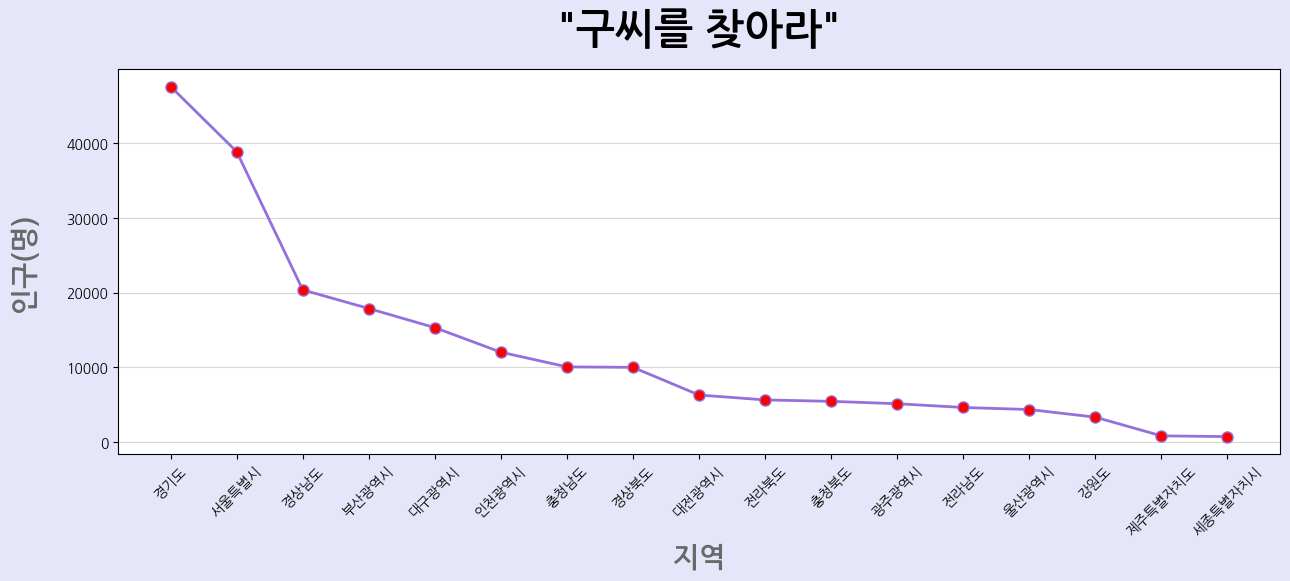

In [ ]:
# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### @혼합 그래프

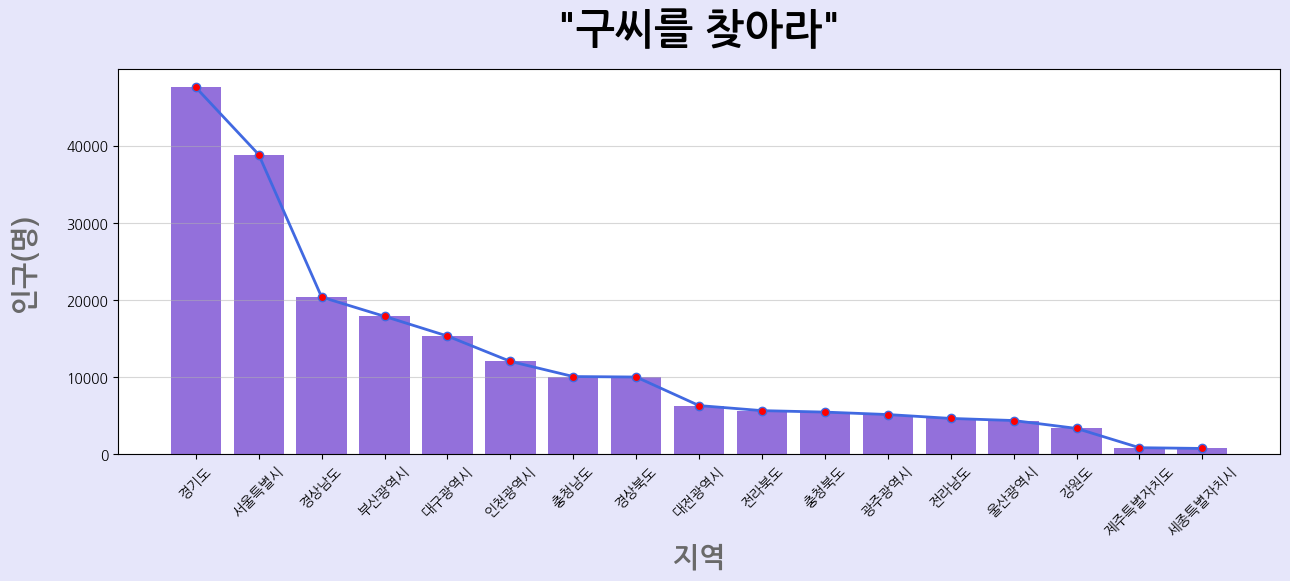

In [ ]:
import matplotlib.pyplot as plt


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red')

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [ ]:
# 파일명 지정하여 저장하기
savefile = './familyname_goo.csv'  # 파일명
# df_goo_group.to_csv(savefile, encoding = 'cp949', mode = 'w') # 파일 저장하기
df_goo_group.to_csv(savefile, mode = 'w')

-----------------------------------------

### **[실습문제] 워드클라우드로 시각화하기**

In [ ]:
# 라이브러리 설치하기
!pip install wordcloud

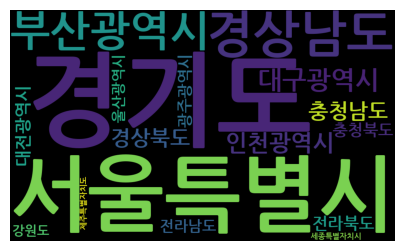

In [ ]:
from wordcloud import WordCloud  # 빈도수가 클수록 문자가 커진다.
import matplotlib.pyplot as plt

# 1. (win)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'HMFMOLD' # C:/Windows/Fonts/HMKMMAG.TTF     #HMFMOLD.TTF

# 1. (코랩)폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

# 2.전처리된 데이터 지정하기
names = df_goo_group.index     # 지역(X축)
counts = df_goo_group['인구']  # 인구수(Y축)
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기어야 인식함

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600,
               background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) # imshow: image show
plt.axis("off") # x, y 축은 보이지 않게함
plt.show()

# 4.파일로 저장하기
wc.to_file('./구씨_워드클라우드.png')



---



### **[실습문제]**
자신의 성씨 데이터 지역별로 그룹핑해서 그래프 그리고 데이터 파일을 저장하기 나타내기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = ' '





----------------------------------

THE END

**#### @투명한 이미지(알파값이 적용된)에 워드 클라우드 나타내기**
마스크 이미지 파일이 필요하다.

{'경기도': 2523923, '서울특별시': 2025779, '부산광역시': 757159, '경상남도': 697357, '경상북도': 603188, '인천광역시': 598187, '대구광역시': 521160, '충청남도': 423510, '전라남도': 413805, '전라북도': 382281, '광주광역시': 338304, '강원도': 338077, '충청북도': 315919, '대전광역시': 309274, '울산광역시': 262050, '제주특별자치도': 140554, '세종특별자치시': 39432}


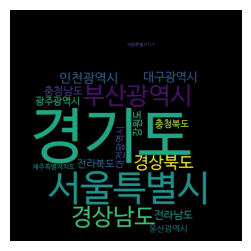

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 코랩에서
# font_path = 'malgun'  # C:/Windows/Fonts/
# font_path = 'H2HDRM' # C:/Windows/Fonts/H2HDRM.TTF


# (토큰명, 빈도수) 딕셔너리 타입으로 변환
names = df_my_group.index
counts = df_my_group['인구']
data = dict(zip(names, counts))
print(data)

# 워드클라우드로 그래프로 시각화
img = cv2.imread('./apple.png')
img_array = np.array(img)
wc = WordCloud(background_color="black",
               font_path=font_path, max_font_size=250, mask=img_array)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('./사과모양_워드클라우드.png')